In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom
from scipy.stats import norm
from scipy.optimize import minimize

# Problem 1

In [10]:
Ns=20
TP=12/Ns
FP=3/Ns

Seguimos las indicaciones de 1_Equal

In [11]:

def sensitivity(ptp, pfp):
    return norm.ppf(ptp, 0, 1)-norm.ppf(pfp, 0, 1)

In [12]:
d=sensitivity(TP, FP)
print(d)

1.2897804926295895


# Problem 2

In [13]:
Ns=20
data=np.array([[15, 3, 2], [5, 12, 3], [4, 2, 14]])

##### Fit a pyschometric functino to responses from category 3

In [14]:
def model1(I, c, sigma):
    return norm.cdf((I-c)/sigma)
def negative_log_likelihood(params, I, N_correct, N_s, function=1, P_guess = None):
    c, sigma = params[0],params[1]
    if function ==1 :
        probabilities = model1(I, c, sigma)
    else:
        raise ValueError("Invalid function name. Supported functions: 'psycometric_1', 'psycometric_2', 'psycometric_3'")

    log_likelihood = sum([binom.logpmf(N, N_s, p) for N, p in zip(N_correct, probabilities)])   # We can see the likelihood of a point as how possible is to have a value given a function with theirs parameters. In this case, the likelihood of each point can be calculated using a binomial distribution. Then to see the likelihood of all the 6 points of the intensity of the stimulus, we should multiply their likelihood because we consider them i.i.d points, however we are using the log-likelihood so we can sum their logarithms.
    return -log_likelihood

In [15]:
N_correct1=[data[i][2] for i in range(3) ]


In [16]:
I_s=[1,2,3] #Estímulos
c_initial_guess = max(I_s)/2   
sigma_initial_guess = max(I_s)/3
initial_guess = [c_initial_guess, sigma_initial_guess]

# We optimize the negative log likelihood function
optimized_parameters = minimize(negative_log_likelihood, initial_guess, args=(I_s, N_correct1, Ns,1))   #We optimize using minimize function from scipy library
c1_optimized, sigma1_optimized = optimized_parameters.x

print(f'Valor óptimo de c en modelo 1: {c1_optimized:.3f}')
print(f'Valor óptimo de sigma en modelo 1: {sigma1_optimized:.3f}')

Valor óptimo de c en modelo 1: 2.635
Valor óptimo de sigma en modelo 1: 1.019


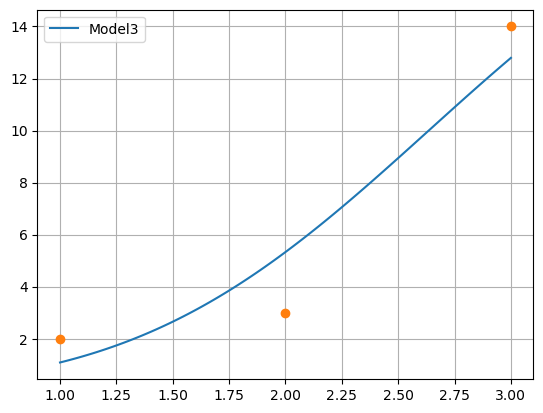

In [17]:
pyscho=[]
for i in np.linspace(1,3,100):
    pyscho.append(Ns*model1(i,c1_optimized,sigma1_optimized))
plt.plot(np.linspace(1,3,100), pyscho, label="Model3")
plt.plot(I_s, N_correct1, 'o')
plt.legend()
plt.grid(True)
plt.show()

##### Sum of responses of categories 2 y 3

Valor óptimo de c en modelo cat 2 y 3: 1.618
Valor óptimo de sigma encat 2 y 3: 1.287


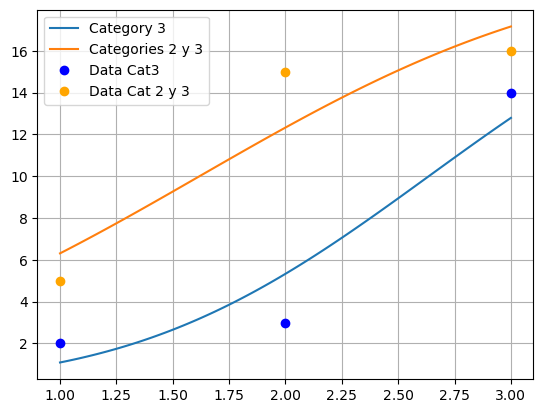

In [18]:
N_correct2=[data[i][2]+data[i][1] for i in range(3) ]

I_s=[1,2,3] #Estímulos
c_initial_guess = max(I_s)/2   
sigma_initial_guess = max(I_s)/3
initial_guess = [c_initial_guess, sigma_initial_guess]

# We optimize the negative log likelihood function
optimized_parameters = minimize(negative_log_likelihood, initial_guess, args=(I_s, N_correct2, Ns,1))   #We optimize using minimize function from scipy library
c2_optimized, sigma2_optimized = optimized_parameters.x

print(f'Valor óptimo de c en modelo cat 2 y 3: {c2_optimized:.3f}')
print(f'Valor óptimo de sigma encat 2 y 3: {sigma2_optimized:.3f}')

pyscho1=[]
psycho2=[]
for i in np.linspace(1,3,100):
    pyscho1.append(Ns*model1(i,c1_optimized,sigma1_optimized))
    psycho2.append(Ns*model1(i,c2_optimized,sigma2_optimized))
plt.plot(np.linspace(1,3,100), pyscho1, label="Category 3")
plt.plot(np.linspace(1,3,100), psycho2, label="Categories 2 y 3")
plt.plot(I_s, N_correct1, 'o', color="b",label="Data Cat3")
plt.plot(I_s, N_correct2, 'o', color="orange", label="Data Cat 2 y 3")
plt.legend()
plt.grid(True)
plt.show()

##### Unequal Variance ROC to stimulus 1 and 2

Aquí simplemente, para cada caso, nos fijamos en el True Positive. Para el false positive solamente contamos las veces que ha aparecido el estímulo y se ha respondido el otro estímulo con el que estamos teniendo en cuenta. Finalmente lo ponemos en un array

In [19]:
stimulus1_TP=15/20
stimulus2_TP=12/20
stimulus3_TP=14/20
stimulus13_FP=4/20
stimulus21_FP=3/20
stimulus12_FP=5/20
stimulus31_FP=2/20
FP13=[ stimulus31_FP, stimulus13_FP]
TP13=[stimulus3_TP, stimulus1_TP]
FP12=[stimulus21_FP, stimulus12_FP]
TP12=[stimulus2_TP, stimulus1_TP]


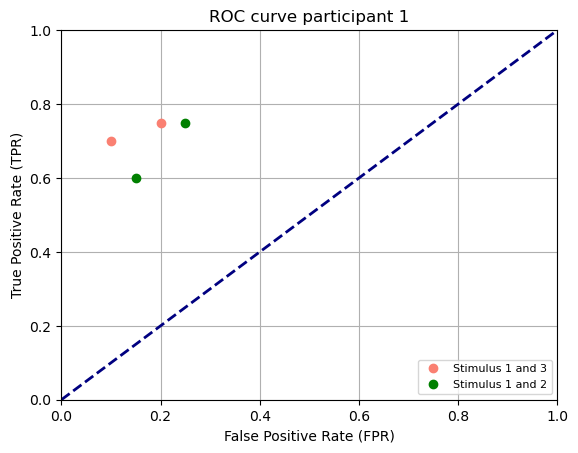

In [20]:
plt.figure()
plt.plot(FP13, TP13, 'o', color="salmon", label="Stimulus 1 and 3")
plt.plot(FP12, TP12, 'o', color="green", label="Stimulus 1 and 2")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve participant 1')
plt.legend(loc='lower right', fontsize=8)
plt.grid()
plt.show()

##### Realizamos el fit con la transformación

In [21]:
def ROC_curve(sigma, mu):
    x=np.linspace(0,1,100)
    y=[]
    for i in x:
        y.append((1/sigma)*norm.ppf(i, 0, 1) + mu/sigma)
    y_fp=[]
    for i in y:
        y_fp.append(norm.cdf(i,0,1))
    return x, y_fp

Es MUY importante recordar la transformación!!!

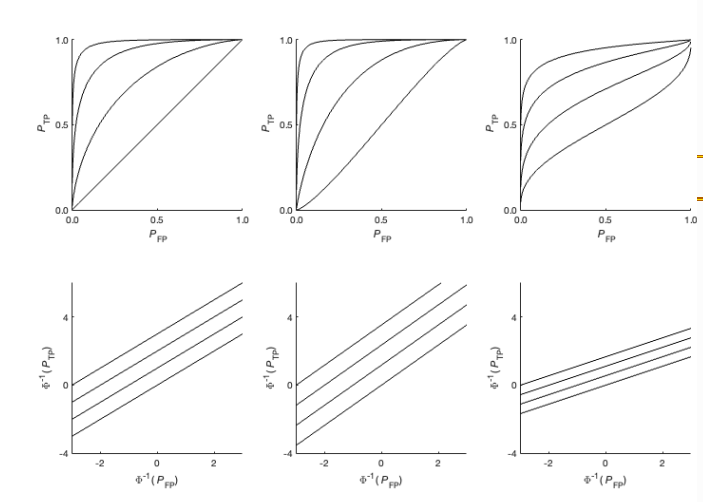

Fijate en las gráficas de abajo, en los ejes. Hay que hacer un ppf para poder hacer una regresión lineal!!!!. 

Al final estamos haciendo el ajuste de esta fórmula

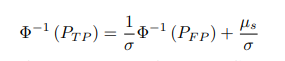

In [22]:
print(norm.ppf(0))

-inf


In [23]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
FP_trans=[norm.ppf(i,0,1) for i in FP12]
TP_trans=[norm.ppf(i,0,1) for i in TP12]
print(TP_trans)
print(FP_trans)
regression.fit(np.array(FP_trans).reshape(-1, 1), TP_trans)
a = regression.coef_[0]
b = regression.intercept_

sigma12=1/a
mu12=b*sigma12

FP_trans=[norm.ppf(i,0,1) for i in FP13]
TP_trans=[norm.ppf(i,0,1) for i in TP13]
regression.fit(np.array(FP_trans).reshape(-1, 1), TP_trans)
a = regression.coef_[0]
b = regression.intercept_

sigma13=1/a
mu13=b*sigma13

[0.2533471031357997, 0.6744897501960817]
[-1.0364333894937898, -0.6744897501960817]


In [24]:
FP_fit12, TP_fit12=ROC_curve(sigma12, mu12)
FP_fit13, TP_fit13=ROC_curve(sigma13, mu13)

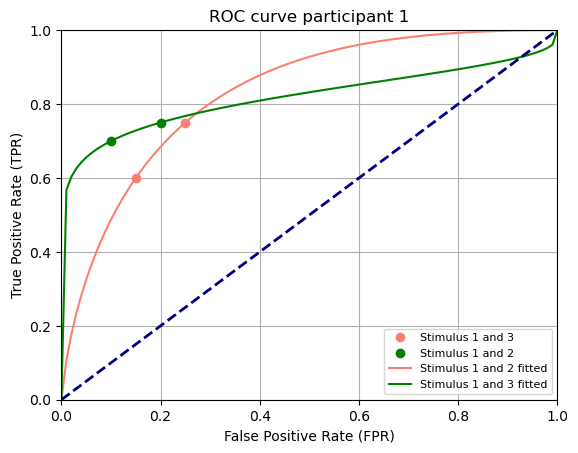

In [25]:
plt.figure()
plt.plot(FP12, TP12, 'o', color="salmon", label="Stimulus 1 and 3")
plt.plot(FP13, TP13, 'o', color="green", label="Stimulus 1 and 2")
plt.plot(FP_fit12, TP_fit12, color="salmon", label="Stimulus 1 and 2 fitted")
plt.plot(FP_fit13, TP_fit13, color="green", label="Stimulus 1 and 3 fitted")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve participant 1')
plt.legend(loc='lower right', fontsize=8)
plt.grid()
plt.show()

In [26]:
print(mu12)
print(mu13)
print(sigma12)
print(sigma13)

1.2541681004155685
2.8186350733487684
0.8594324080550781
2.93112510486796


# Problem 3 (mirar solución Python)

# 4. Problem 4: Smile intensity

Cargamos las imágenes

In [27]:
archivo = "Data/images.txt"
images = np.loadtxt(archivo)
archivo = "Data/smile_intensity.txt"
smile = np.loadtxt(archivo)

Funciones para reconstruir la imagen

In [28]:
def reconstruct(vector):
    matrix = vector.reshape((72, 52))
    return matrix

def show_im(matrix):
    plt.imshow(matrix, cmap='gray')

##### 4.1 Determinamos cuantos componentes principales contienen el 90% de la varianza total en el set

400 3744


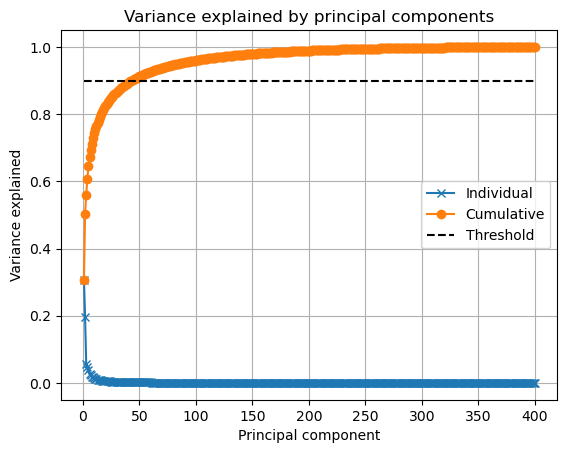

In [29]:
## PCA de Intro to ML
from scipy.linalg import svd

X = images
N = len(X)

mean_image = np.mean(X, axis=0)

# Subtract mean value from data
Y = X - mean_image
# PCA by computing SVD of Y
U,S,Vt = svd(Y,full_matrices=False)

print(len(Vt), len(Vt[0]))

# Compute variance explained by principal components
rho = (S*S) / (S*S).sum() 

threshold = 0.9

# Plot variance explained
plt.figure()
plt.plot(range(1,len(rho)+1),rho,'x-')
plt.plot(range(1,len(rho)+1),np.cumsum(rho),'o-')
plt.plot([1,len(rho)],[threshold, threshold],'k--')
plt.title('Variance explained by principal components');
plt.xlabel('Principal component');
plt.ylabel('Variance explained');
plt.legend(['Individual','Cumulative','Threshold'])
plt.grid()
plt.show()

In [30]:
# How many components we want to select over the threshold
positions = np.where(np.cumsum(rho[0:len(rho)]) > threshold)
n_pcas=positions[0][0]
print('We can consider just', n_pcas, 'principal components.')
Vt_pca=Vt[0:n_pcas]

We can consider just 43 principal components.


Reconstruimos la imagen en la fila 23 utilizando solo dichos componentes. Para ello, sacamos los scores como la multiplicación de las funciones U y S y nos quedamos únicamente con las primeras n_pcas columnas. La reconstrucción a partir de las PCA será la multiplicación de los scores seleccionados por las pca seleccionadas de Vt. Comprueba siempre por dimensiones

In [31]:
scores = np.dot(U, np.diag(S))
scores_PCsel=scores[:, :n_pcas]

X_recons=np.dot(scores_PCsel,Vt_pca) + mean_image #NO OLVIDAR LA MEAN IMAGE

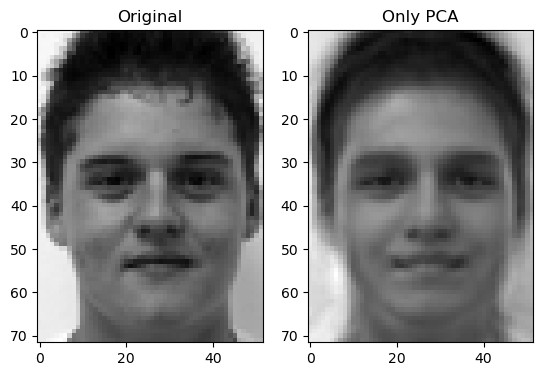

In [32]:
id_im=23
row23=X[id_im]
row23_recons=X_recons[id_im]
plt.subplot(121)
plt.title("Original")
show_im(reconstruct(row23))
plt.subplot(122)
plt.title("Only PCA")
show_im(reconstruct(row23_recons))


##### 4.2 Forward selection

In [33]:
print("The proportion of variance of 1st component is ", rho[0])
print("The proportion of variance of 16th component is ", rho[15])

The proportion of variance of 1st component is  0.3073176468381734
The proportion of variance of 16th component is  0.007447744330169955


##### 4.3 Lowest scores 

Encontramos el score máximo y mínimo en las PCAs dadas.

In [34]:
# Select PC
pc = 1

# We select the max and min score by column (by PC)
im_pc1_max = np.max(scores[:,pc-1])*Vt[pc-1,:] + mean_image
im_pc1_min = np.min(scores[:,pc-1])*Vt[pc-1,:] + mean_image

# Select PC
pc = 16

# We select the max and min score by column (by PC)
im_pc16_max = np.max(scores[:,pc-1])*Vt[pc-1,:] + mean_image
im_pc16_min = np.min(scores[:,pc-1])*Vt[pc-1,:] + mean_image

Visaulizamos

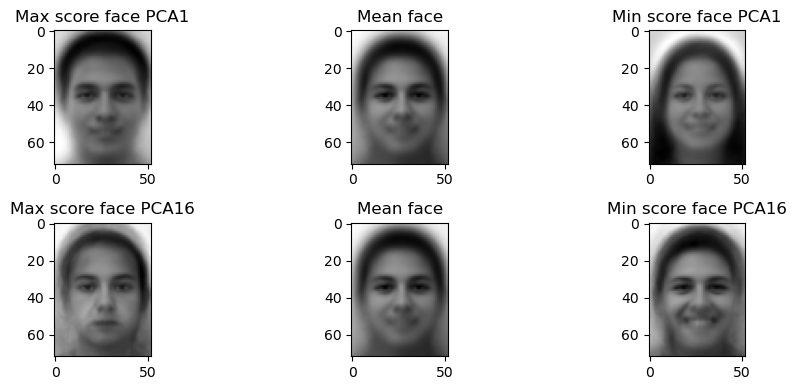

In [35]:
## Plotting
# Create a figure with two subplots
plt.figure(figsize=(10, 4))  # Adjust the figure size as needed

# Plot the first histogram in the left subplot
plt.subplot(2, 3, 1)
show_im(reconstruct(im_pc1_max))
plt.title('Max score face PCA1')

# Plot the second histogram in the right subplot
plt.subplot(2, 3, 2)
show_im(reconstruct(mean_image))
plt.title('Mean face')

# Plot the second histogram in the right subplot
plt.subplot(2, 3, 3)
show_im(reconstruct(im_pc1_min))
plt.title('Min score face PCA1')


# Plot the first histogram in the left subplot
plt.subplot(2, 3, 4)
show_im(reconstruct(im_pc16_max))
plt.title('Max score face PCA16')

# Plot the second histogram in the right subplot
plt.subplot(2, 3, 5)
show_im(reconstruct(mean_image))
plt.title('Mean face')

# Plot the second histogram in the right subplot
plt.subplot(2, 3, 6)
show_im(reconstruct(im_pc16_min))
plt.title('Min score face PCA16')


# Adjust the spacing between subplots
plt.tight_layout()

# Show the combined figure with both histograms
plt.show()

##### 4.4 Covariance

In [36]:
scores_pca1=scores[:, 0]
scores_pca16=scores[:,15]
covariance1=np.cov(scores_pca1,smile)
covariance16=np.cov(scores_pca16,smile)
print("The covariance between smile and PCA1 is ",covariance1[0,1])
print("The covariance between smile and PCA16 is ", covariance16[0,1])

The covariance between smile and PCA1 is  -0.011711985394572693
The covariance between smile and PCA16 is  -0.2843785884925844


##### 4.5 Discussion

La feature numero 16 captura la sonrisa, mientras que la 1 la masculinidad o feminidad. Esto se puede observar también en la covarianza.

##### 4.6 Covariance between smile intensity and scores

Importante el valor absoluto para comparar covarianzas!!

In [37]:
cov_scores_smile=[]
for i in range(0,n_pcas):
    sc=scores_PCsel[:, i]
    cov=np.cov(sc,smile)
    cov_scores_smile.append(np.abs(cov[0,1]))

max_smile = np.argsort(cov_scores_smile)[-3:]
max_smile_pc=[i+1 for i in max_smile]
print("The best components for representing the smile are ", max_smile_pc)

The best components for representing the smile are  [16, 2, 5]


##### 4.7 Fit of regression models

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
def scores_pcs(pcs):
    s=[]
    for i in pcs:
        s.append(scores[:,i-1])
    return s

In [48]:
regression = LinearRegression()
#Regression models
pcs_model1=[1,2,3]
pcs_model2=max_smile_pc
ids_model1=[i-1 for i in pcs_model1]
ids_model2=[i-1 for i in pcs_model2]
scores_model1=scores[ids_model1]
scores_model2=scores[ids_model2]

B_feature1=np.dot(images,Vt[ids_model1].T)
B_feature2=np.dot(images,Vt[ids_model2].T)

In [49]:
#regression.fit(np.array(scores_model1).T, smile) #Transponemos por cómo hemos definido la matriz
regression.fit(B_feature1,smile)
# Obtener los coeficientes de la regresión
a1 = regression.coef_
b1 = regression.intercept_

print(f"Coef 'a' model 1: {a1}")
print(f"Coef b model 1: {b1}")

#regression.fit(np.array(scores_model2).T, smile)
regression.fit(B_feature2,smile)
# Obtener los coeficientes de la regresión
a2 = regression.coef_
b2 = regression.intercept_

print(f"Coef 'a' model 2: {a2}")
print(f"Coef b model 2: {b2}")

Coef 'a' model 1: [-0.00022709  0.01094989 -0.01436864]
Coef b model 1: 0.43701546644417333
Coef 'a' model 2: [-0.22752349  0.01094989 -0.05890013]
Coef b model 2: 0.847700813162293


##### 4.8 Synthetic images

In [50]:
ratings=[-0.5,0.,0.5,1.0,1.5, 2]

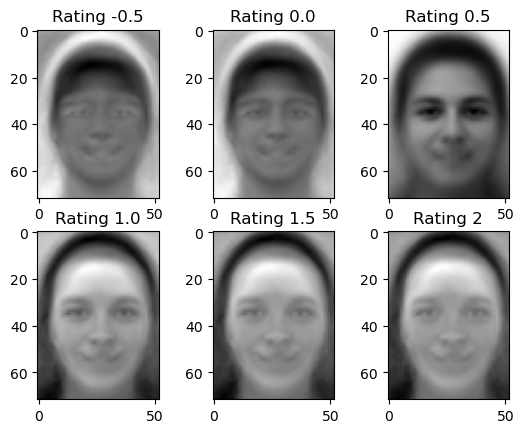

In [51]:
#Model 1
i=1
for rat in ratings:
    norm_w_sqr=np.linalg.norm(a1)**2
    alfa=(float(rat) - b1)/norm_w_sqr
    i0=alfa*a1
    reconst_img=np.dot(i0,Vt[ids_model1]) + mean_image
    plt.subplot(2,3,i)
    show_im(reconstruct(reconst_img))
    i+=1
    plt.title("Rating " + str(rat))

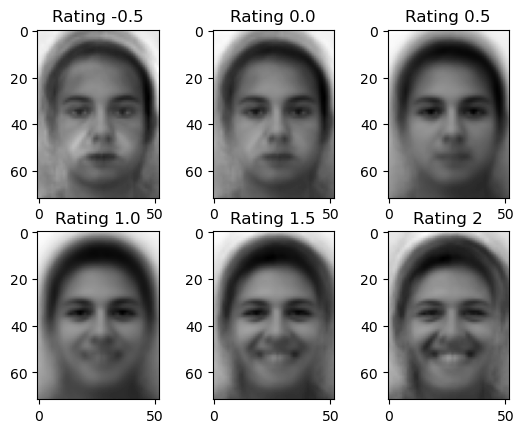

In [52]:
#Model 2
i=1
for rat in ratings:
    norm_w_sqr=np.linalg.norm(a2)**2
    alfa=(float(rat) - b2)/norm_w_sqr
    i0=alfa*a2
    reconst_img=np.dot(i0,Vt[ids_model2]) + mean_image
    plt.subplot(2,3,i)
    show_im(reconstruct(reconst_img))
    i+=1
    plt.title("Rating " + str(rat))